In [ ]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Flatten, Dropout, ZeroPadding2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
custom_model = Sequential()
custom_model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(224,224,3)))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(256,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(512,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(1024,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Flatten())
custom_model.add(Dense(4096, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(3, activation='softmax'))

In [ ]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
#es=EarlyStopping(monitor='val_loss', verbose=1, patience=10)

opt = SGD(learning_rate=1e-5, momentum=0.9)
opt1 = Adam(learning_rate= 0.0001)
opt3 = RMSprop(learning_rate=0.0001, decay=1e-6)

custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt1,metrics=['accuracy'])

mc = ModelCheckpoint("Custom_model.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = custom_model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 514s 9s/step - loss: 0.5490 - accuracy: 0.7714 - val_loss: 0.9953 - val_accuracy: 0.3282
Epoch 2/150
56/56 [==============================] - 30s 537ms/step - loss: 0.3655 - accuracy: 0.8558 - val_loss: 1.0017 - val_accuracy: 0.6542
Epoch 3/150
56/56 [==============================] - 26s 457ms/step - loss: 0.3636 - accuracy: 0.8552 - val_loss: 0.9128 - val_accuracy: 0.4780
Epoch 4/150
56/56 [==============================] - 24s 434ms/step - loss: 0.3764 - accuracy: 0.8524 - val_loss: 0.8363 - val_accuracy: 0.5374
Epoch 5/150
56/56 [==============================] - 24s 434ms/step - loss: 0.3337 - accuracy: 0.8731 - val_loss: 0.8182 - val_accuracy: 0.4229
Epoch 6/150
56/56 [==============================] - 29s 525ms/step - loss: 0.3115 - accuracy: 0.8882 - val_loss: 0.6225 - val_accuracy: 0.8833
Epoch 7/150
56/56 [==============================] - 24s 435ms/step - loss: 0.2737 - accuracy: 0.8916 - val_loss: 0.6116 - val_accuracy: 0

In [ ]:
custom_model = Sequential()
custom_model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(224,224,3)))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(256,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(512,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(1024,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Flatten())
custom_model.add(Dense(4096, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(3, activation='softmax'))

In [ ]:
#es=EarlyStopping(monitor='val_loss', verbose=1, patience=10)

opt = SGD(learning_rate=1e-5, momentum=0.9)
opt1 = Adam(learning_rate= 0.0001)
opt2 = RMSprop(learning_rate=0.0001, decay=1e-6)

custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt1,metrics=['accuracy'])

mc = ModelCheckpoint("Custom_model.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = custom_model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 923s 16s/step - loss: 2.3651 - accuracy: 0.7541 - val_loss: 6.6164 - val_accuracy: 0.2489
Epoch 2/150
56/56 [==============================] - 30s 535ms/step - loss: 1.9401 - accuracy: 0.8055 - val_loss: 7.9221 - val_accuracy: 0.2489
Epoch 3/150
56/56 [==============================] - 30s 533ms/step - loss: 1.2989 - accuracy: 0.8586 - val_loss: 21.4434 - val_accuracy: 0.2489
Epoch 4/150
56/56 [==============================] - 30s 530ms/step - loss: 1.4530 - accuracy: 0.8485 - val_loss: 20.1941 - val_accuracy: 0.2489
Epoch 5/150
56/56 [==============================] - 35s 630ms/step - loss: 1.3904 - accuracy: 0.8675 - val_loss: 19.5609 - val_accuracy: 0.3326
Epoch 6/150
56/56 [==============================] - 35s 626ms/step - loss: 0.7728 - accuracy: 0.8994 - val_loss: 15.9861 - val_accuracy: 0.5110
Epoch 7/150
56/56 [==============================] - 31s 542ms/step - loss: 0.8584 - accuracy: 0.9022 - val_loss: 11.8900 - val_accur

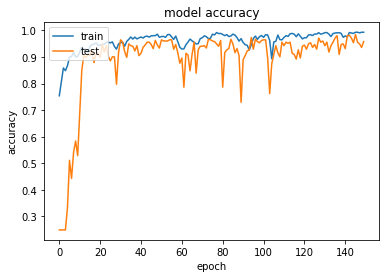

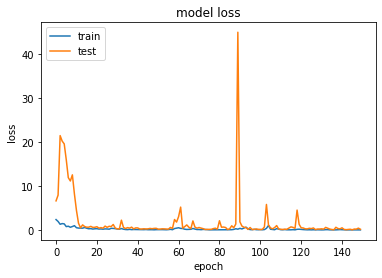

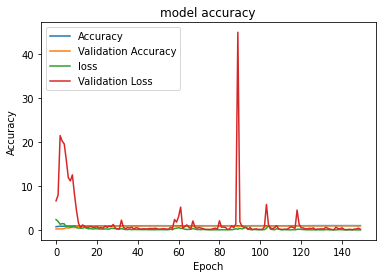

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
custom_model = Sequential()
custom_model.add(Conv2D(64,kernel_size=(2,2),padding='valid', activation='relu',input_shape=(224,224,3)))
custom_model.add(Conv2D(64,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(64,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(128,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(128,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(128,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(256,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(256,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(256,kernel_size=(2,2),padding='same', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(512,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(512,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(512,kernel_size=(2,2),padding='same', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(1024,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(1024,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(Conv2D(1024,kernel_size=(2,2),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Flatten())
custom_model.add(Dense(3072, activation='relu'))
custom_model.add(Dropout(0.7))
custom_model.add(Dense(3072, activation='relu'))
custom_model.add(Dropout(0.7))
custom_model.add(Dense(3, activation='softmax'))

In [ ]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 64)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      16448     
                                                                 
 conv2d_2 (Conv2D)           (None, 221, 221, 64)      16448     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 128)     32896     
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 128)     65664     
                                                        

In [ ]:
#es=EarlyStopping(monitor='val_loss', verbose=1, patience=10)

opt = SGD(learning_rate=1e-5, momentum=0.9)
opt1 = Adam(learning_rate= 0.0001)
opt3 = RMSprop(learning_rate=0.0001, decay=1e-6)

custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

mc = ModelCheckpoint("Custom_model.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = custom_model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 34s 589ms/step - loss: 1.3329 - accuracy: 0.5299 - val_loss: 1.0806 - val_accuracy: 0.4229
Epoch 2/150
56/56 [==============================] - 33s 587ms/step - loss: 0.8054 - accuracy: 0.7043 - val_loss: 1.0787 - val_accuracy: 0.5352
Epoch 3/150
56/56 [==============================] - 30s 541ms/step - loss: 0.7484 - accuracy: 0.7132 - val_loss: 1.0352 - val_accuracy: 0.4493
Epoch 4/150
56/56 [==============================] - 33s 586ms/step - loss: 0.6392 - accuracy: 0.7535 - val_loss: 0.9925 - val_accuracy: 0.6410
Epoch 5/150
56/56 [==============================] - 34s 599ms/step - loss: 0.5930 - accuracy: 0.7876 - val_loss: 0.8880 - val_accuracy: 0.6586
Epoch 6/150
56/56 [==============================] - 34s 599ms/step - loss: 0.5715 - accuracy: 0.7915 - val_loss: 0.7741 - val_accuracy: 0.7225
Epoch 7/150
56/56 [==============================] - 34s 598ms/step - loss: 0.5591 - accuracy: 0.7921 - val_loss: 0.6869 - val_accuracy:

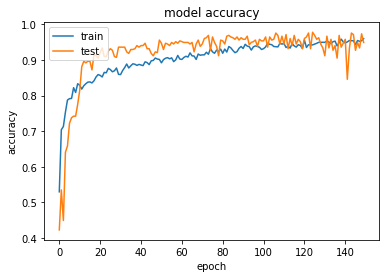

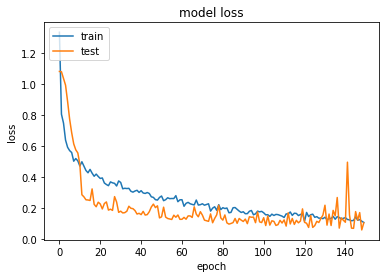

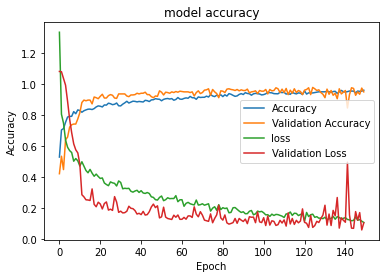

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
#es=EarlyStopping(monitor='val_loss', verbose=1, patience=10)

opt = SGD(learning_rate=1e-5, momentum=0.9)
opt1 = Adam(learning_rate= 0.0001)
opt2 = RMSprop(learning_rate=0.0001, decay=1e-6)

custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt2,metrics=['accuracy'])

mc = ModelCheckpoint("Custom_model.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = custom_model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 35s 591ms/step - loss: 3.1109 - accuracy: 0.7356 - val_loss: 5.0424 - val_accuracy: 0.2489
Epoch 2/150
56/56 [==============================] - 30s 534ms/step - loss: 2.4319 - accuracy: 0.7954 - val_loss: 19.4343 - val_accuracy: 0.2489
Epoch 3/150
56/56 [==============================] - 30s 539ms/step - loss: 1.8044 - accuracy: 0.8245 - val_loss: 12.9418 - val_accuracy: 0.2489
Epoch 4/150
56/56 [==============================] - 30s 541ms/step - loss: 1.6628 - accuracy: 0.8552 - val_loss: 16.5622 - val_accuracy: 0.2489
Epoch 5/150
56/56 [==============================] - 30s 534ms/step - loss: 1.5014 - accuracy: 0.8569 - val_loss: 16.7074 - val_accuracy: 0.2489
Epoch 6/150
56/56 [==============================] - 35s 629ms/step - loss: 1.1720 - accuracy: 0.8821 - val_loss: 16.3894 - val_accuracy: 0.2555
Epoch 7/150
56/56 [==============================] - 33s 596ms/step - loss: 1.2876 - accuracy: 0.8658 - val_loss: 16.6627 - val_acc

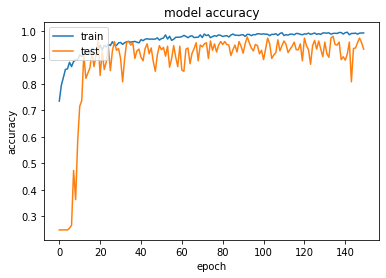

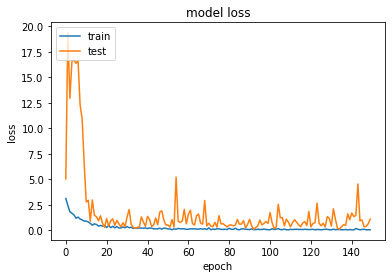

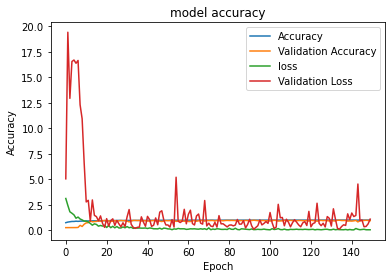

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = custom_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[143   4   2]
 [  0 113   0]
 [  6   4 182]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.96      0.96      0.96       149
             Healthy       0.93      1.00      0.97       113
        Rust disease       0.99      0.95      0.97       192

            accuracy                           0.96       454
           macro avg       0.96      0.97      0.96       454
        weighted avg       0.97      0.96      0.96       454



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = custom_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[143   1   5]
 [  1 112   0]
 [  3   1 188]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.97      0.96      0.97       149
             Healthy       0.98      0.99      0.99       113
        Rust disease       0.97      0.98      0.98       192

            accuracy                           0.98       454
           macro avg       0.98      0.98      0.98       454
        weighted avg       0.98      0.98      0.98       454



In [ ]:
valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Valid",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")

Found 30 images belonging to 3 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = custom_model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(valid_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[6 3 1]
 [6 4 0]
 [2 5 3]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.43      0.60      0.50        10
             Healthy       0.33      0.40      0.36        10
        Rust disease       0.75      0.30      0.43        10

            accuracy                           0.43        30
           macro avg       0.50      0.43      0.43        30
        weighted avg       0.50      0.43      0.43        30



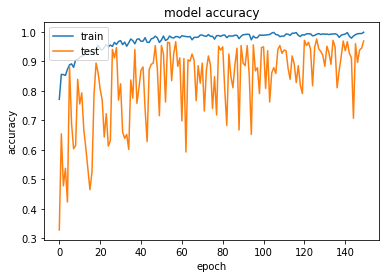

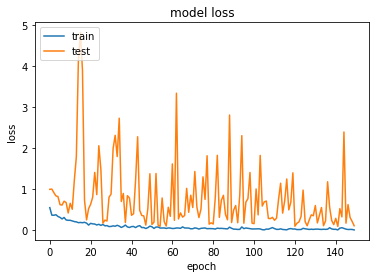

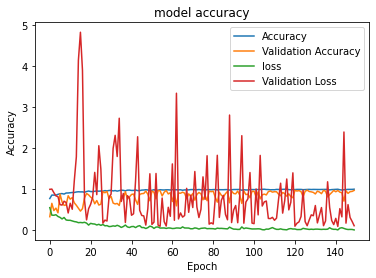

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
custom_model = Sequential()
custom_model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(224,224,3)))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(256,kernel_size=(5,5),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(512,kernel_size=(5,5),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(Conv2D(1024,kernel_size=(7,7),padding='valid', activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
custom_model.add(BatchNormalization())
custom_model.add(Flatten())
custom_model.add(Dense(4096, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(3, activation='softmax'))

In [ ]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 256)      0

In [ ]:
#es=EarlyStopping(monitor='val_loss', verbose=1, patience=10)

opt = SGD(learning_rate=1e-5, momentum=0.9)
opt1 = Adam(learning_rate= 0.0001)
opt3 = RMSprop(learning_rate=0.0001, decay=1e-6)

custom_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=opt1,metrics=['accuracy'])

mc = ModelCheckpoint("Custom_model1.h5", monitor="val_accuracy", mode="max", save_best_only=True)

H = custom_model.fit(train_generator,validation_data=test_generator,epochs=150,verbose=1,callbacks=[mc])

Epoch 1/150
56/56 [==============================] - 32s 506ms/step - loss: 0.6251 - accuracy: 0.7261 - val_loss: 0.9720 - val_accuracy: 0.6476
Epoch 2/150
56/56 [==============================] - 25s 444ms/step - loss: 0.4338 - accuracy: 0.8385 - val_loss: 0.8983 - val_accuracy: 0.6167
Epoch 3/150
56/56 [==============================] - 25s 446ms/step - loss: 0.4229 - accuracy: 0.8351 - val_loss: 0.9164 - val_accuracy: 0.3568
Epoch 4/150
56/56 [==============================] - 25s 452ms/step - loss: 0.4015 - accuracy: 0.8457 - val_loss: 0.8408 - val_accuracy: 0.5947
Epoch 5/150
56/56 [==============================] - 25s 442ms/step - loss: 0.3662 - accuracy: 0.8608 - val_loss: 0.9046 - val_accuracy: 0.5220
Epoch 6/150
56/56 [==============================] - 25s 443ms/step - loss: 0.3633 - accuracy: 0.8642 - val_loss: 0.8064 - val_accuracy: 0.5176
Epoch 7/150
56/56 [==============================] - 25s 450ms/step - loss: 0.3785 - accuracy: 0.8535 - val_loss: 1.0763 - val_accuracy:

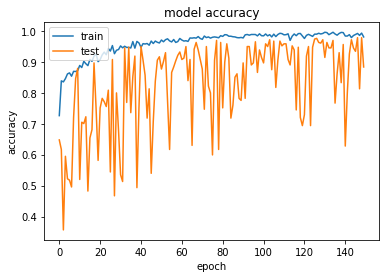

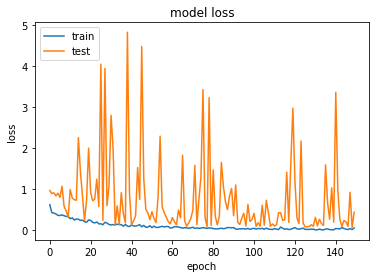

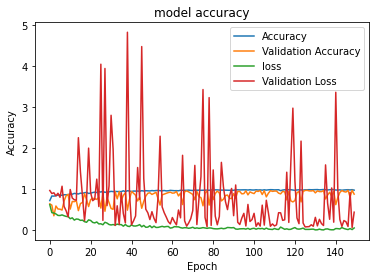

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()